In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel("cardic_data.xlsx")

In [6]:
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
data.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [25]:
for i in data.select_dtypes("object"):
    print (i)
    print (data[i].value_counts(),'\n')

SEXE
homme    725
femme    193
Name: SEXE, dtype: int64 

TDT
ASY    496
DNA    203
AA     173
AT      46
Name: TDT, dtype: int64 

ECG
Normal    552
LVH       188
ST        178
Name: ECG, dtype: int64 

ANGINE
Non    547
Oui    371
Name: ANGINE, dtype: int64 

PENTE
Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64 



In [53]:
dt = data[["AGE", "PAR", "CHOLESTEROL", "FCMAX"]]

In [61]:
liste = ["AGE", "PAR", "CHOLESTEROL", "FCMAX"]

In [58]:
dt.head()

,AGE,PAR,CHOLESTEROL,FCMAX
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


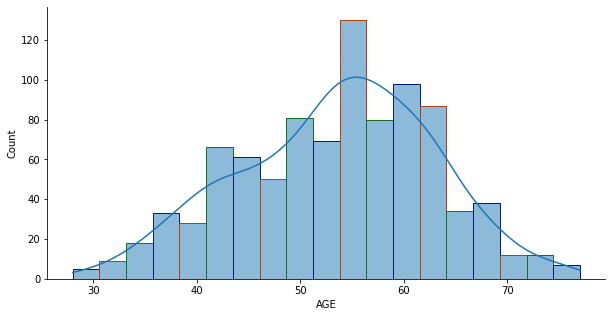

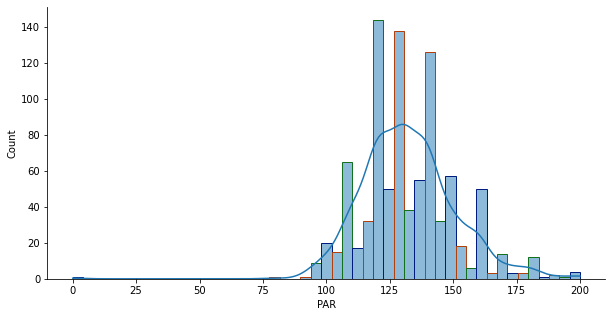

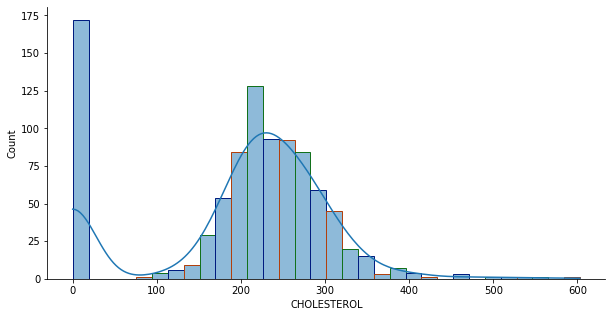

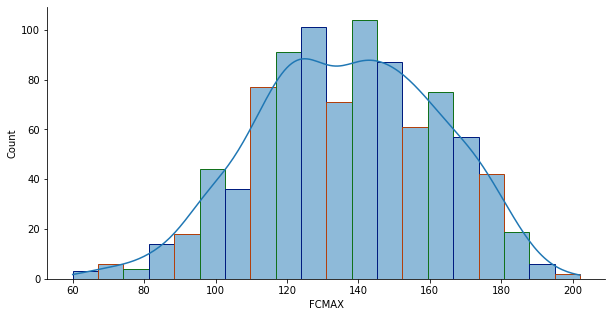

In [64]:
for j in liste:
    plt.figure(figsize=(10,5))
    sns.histplot(x=dt[j], palette=sns.color_palette("pastel"), edgecolor=sns.color_palette("dark", 3), kde=True)
    sns.despine()

## On observe la distribution des valeurs pour chacune des variables quantitative, globalement on observe une ditribution approximativement normal.

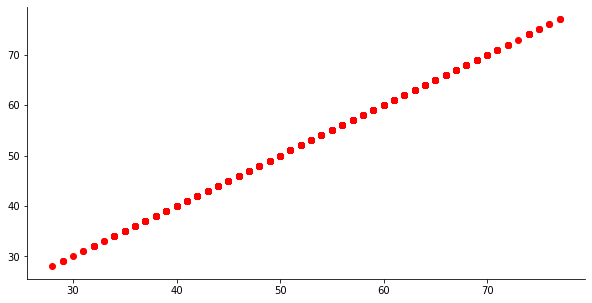

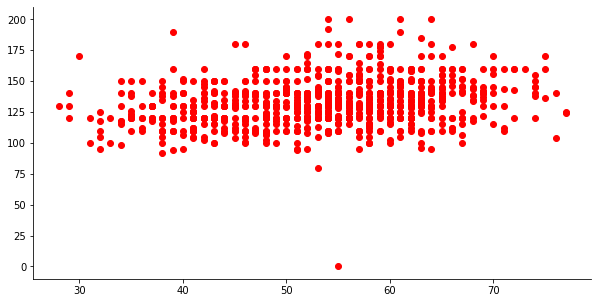

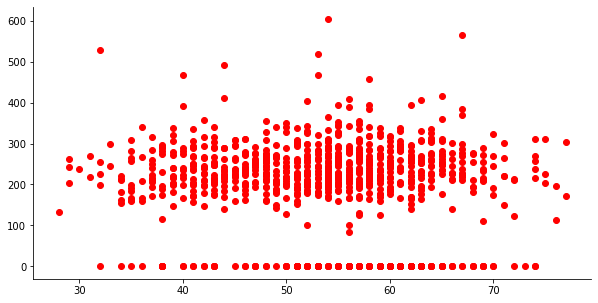

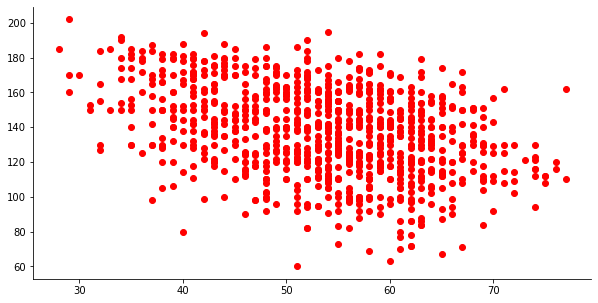

In [80]:
for k in liste:
    plt.figure(figsize=(10,5))
    plt.scatter(data["AGE"], dt[k], c = ['red'])
    #pyplot.scatter(x, y2, c = 'yellow')
    sns.despine()

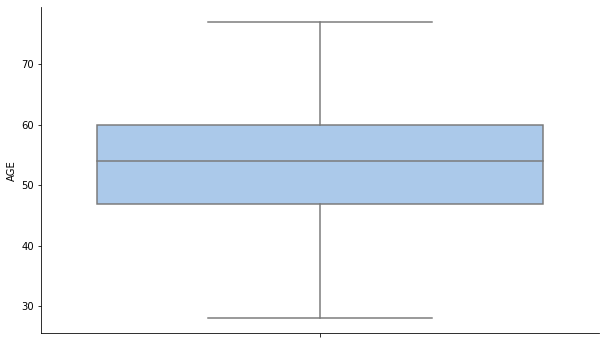

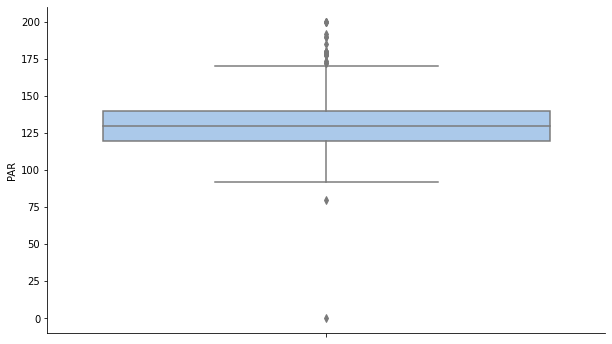

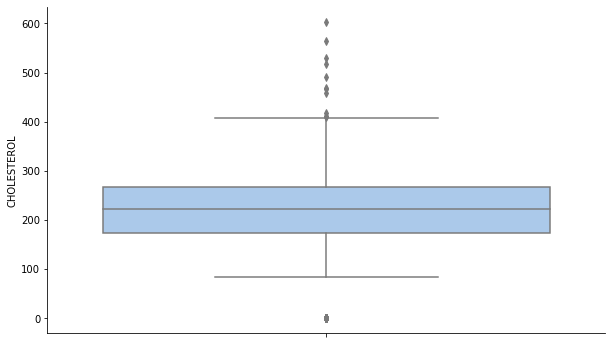

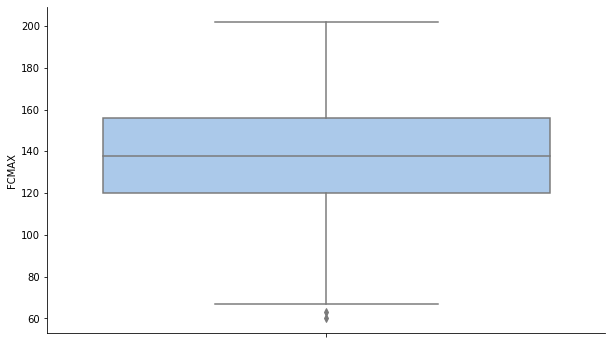

In [47]:
for i in dt:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=dt, y=i, palette=sns.color_palette("pastel"))
    sns.despine()

## On distingue ainsi clairement les valeurs aberentes pour chacune des variables quantitatifs, on poura ainsi entreprendre une demarche juditieuse pour les traiter

In [81]:
data.groupby(['SEXE'])['CŒUR'].aggregate('count').reset_index().sort_values('SEXE',ascending=False)

,SEXE,CŒUR
1,homme,725
0,femme,193


In [86]:
data.groupby(['TDT'])['CŒUR'].aggregate('count').reset_index().sort_values('TDT',ascending=False)

,TDT,CŒUR
3,DNA,203
2,AT,46
1,ASY,496
0,AA,173


In [83]:
data.groupby(['ECG'])['CŒUR'].aggregate('count').reset_index().sort_values('ECG',ascending=False)

,ECG,CŒUR
2,ST,178
1,Normal,552
0,LVH,188


In [84]:
data.groupby(['ANGINE'])['CŒUR'].aggregate('count').reset_index().sort_values('ANGINE',ascending=False)

,ANGINE,CŒUR
1,Oui,371
0,Non,547
